In [130]:
import requests
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.linalg import null_space
import time
from scipy.stats.distributions import chi2
import pickle
from scipy.sparse import csc_matrix
from scipy.sparse.linalg import inv, splu
from scipy.interpolate import interp1d
from scipy.fft import fft, ifft, fftshift
import pygmt

In [2]:
#panda dataframe
df = pd.read_csv('midas.IGS14_1.txt', delim_whitespace= True, header=None)
#numpy array just because its easier for me
data = np.array(df)


C:\Users\gui-win10\AppData\Local\Temp\ipykernel_16912\2055997005.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('midas.IGS14_1.txt', delim_whitespace= True, header=None)


In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,00NA,MIDAS5,2008.2355,2018.7324,10.4969,3190,2968,5171,0.036213,0.058799,...,0.072,0.116,0.072,0.002145,0.002358,0.008469,1,-12.466639,-229.156012,104.84337
1,01NA,MIDAS5,2008.2683,2019.7426,11.4743,2362,2362,3599,0.035826,0.059595,...,0.083,0.089,0.113,0.001910,0.001951,0.006980,1,-12.478223,-229.017953,105.37638
2,02NA,MIDAS5,2008.7255,2016.9993,8.2738,1913,1913,3392,0.036171,0.059940,...,0.064,0.090,0.071,0.001904,0.002059,0.007934,0,-12.355923,-229.118271,117.65070
3,0ABI,MIDAS5,2009.4428,2024.1862,14.7434,5365,5365,10003,0.015101,0.014912,...,0.081,0.073,0.059,0.002124,0.002127,0.008196,0,68.354344,-341.183556,431.36114
4,0ABY,MIDAS5,2015.2717,2024.1862,8.9145,3242,3242,5756,0.018469,0.013932,...,0.046,0.048,0.056,0.002114,0.001860,0.007450,0,58.658908,-343.820357,60.52724


In [4]:
# plot from 2008 to 2022

list_of_chosen_stations = [
    "CALB", "CAMT", "CAOD", "CARK", "CMBB", "CMOD",
    "CROW", "CYTE", "DIAB", "FLNT", "LUTZ", "MHCB",
    "P140", "P171", "P172", "P174", "P175", "P180",
    "P210", "P211", "P212", "P213", "P214", "P215",
    "P216", "P217", "P226", "P227", "P228", "P229",
    "P230", "P231", "P232", "P233", "P234", "P235",
    "P241", "P242", "P243", "P244", "P247", "P248",
    "P249", "P250", "P252", "P253", "P254", "P255",
    "P256", "P257", "P258", "P265", "P266", "P267",
    "P268", "P271", "P274", "P275", "P276", "P285",
    "P286", "P287", "P288", "P289", "P290"
]

In [5]:
# year_begin, year_end = 2009, 2022

# fig, axes = plt.subplots(nrows=13, ncols=5, figsize=(30, 45))  # Adjust the figsize based on your display/requirements

# # Flatten the axes array for easier iteration
# ax_flat = axes.flatten()

# for i, df in enumerate(dfs):
#     station = df.loc[0, 'site']
#     print(f"Plotting {i+1} of {len(dfs)}", end="\r")    
#     time = df.iloc[:, 2]
#     east = df.iloc[:, 8]
#     north = df.iloc[:, 10]    
#     up = df.iloc[:, 12]

#     ax = ax_flat[i]
#     # Plotting time vs east, north, and up
#     ax.plot(time, east, label='East')
#     ax.plot(time, north, label='North')
#     ax.plot(time, up, label='Up')
#     ax.axis(xmin=year_begin, xmax=year_end)
#     ax.grid(True)
            
#     ax.set_title(station)
#     ax.set_xlabel('Time')
#     ax.set_ylabel('Displacement')
#     ax.legend()

# # Adjust layout to prevent overlap
# plt.tight_layout()

# # Show the plot
# plt.savefig(f"selected_stations_{year_begin}_{year_end}.png");
# # plt.savefig(f"all_stations.png")

In [6]:
# keys = ["station", "Q_yy_east_inv", "Q_yy_north_inv", "Q_yy_up_inv", "time", "east", "north", "up"]

# d = {key: [] for key in keys}

# def get_data_we_want(df):
#     station = df.iloc[0, 0]
#     time = df.iloc[:, 2]
#     east = df.iloc[:, 8]
#     north = df.iloc[:, 10]    
#     up = df.iloc[:, 12]

#     sigma_east = df.iloc[:, 14]
#     sigma_north = df.iloc[:, 15]
#     sigma_up = df.iloc[:, 16]

#     Q_yy_east = np.diag(sigma_east*sigma_east)
#     Q_yy_north = np.diag(sigma_north*sigma_north)
#     Q_yy_up = np.diag(sigma_up*sigma_up)

#     Q_yy_east_sparse = csc_matrix(Q_yy_east)
#     Q_yy_north_sparse = csc_matrix(Q_yy_north)
#     Q_yy_up_sparse = csc_matrix(Q_yy_up)

#     Q_yy_east_inv_sparse = inv(Q_yy_east_sparse)
#     Q_yy_north_inv_sparse = inv(Q_yy_north_sparse)
#     Q_yy_up_inv_sparse = inv(Q_yy_up_sparse)

#     return station, Q_yy_east_inv_sparse, Q_yy_north_inv_sparse, Q_yy_up_inv_sparse, time, east, north, up




In [7]:
# dfs = []

# for file in list_of_chosen_stations:
#     file_path = os.path.join("DATA", f"{file}.tenv3")
#     df = pd.read_csv(file_path, sep=r"\s+", header=0)
#     filtered_df = df[(df.iloc[:, 2] > 2008) & (df.iloc[:, 2] < 2022)]
#     dfs.append(filtered_df)


In [8]:
# for i, df in enumerate(dfs):
#     print(f"Processing {i+1} out of {len(dfs)}.", end="\r")
#     station, Q_yy_east_inv_sparse, Q_yy_north_inv_sparse, Q_yy_up_inv_sparse, time, east, north, up = get_data_we_want(df)
#     d["station"].append(station)
#     d["Q_yy_east_inv"].append(Q_yy_east_inv_sparse)
#     d["Q_yy_north_inv"].append(Q_yy_north_inv_sparse)
#     d["Q_yy_up_inv"].append(Q_yy_up_inv_sparse)
#     d["time"].append(time)
#     d["east"].append(east)
#     d["north"].append(north)
#     d["up"].append(up)

In [9]:
# filename = "d.pkl"
# with open(filename, "wb") as f:
#     pickle.dump(d, f)

In [19]:
def A0_matrix(station_idx):
    A = np.ones((len(d['time'][station_idx]), 2))
    A[:, 1] = np.array(d['time'][station_idx])
    return A



In [29]:
def A1_matrix(t, indices):
    if len(indices) > 2:
        raise ValueError("indices should be of length 2")
    
    A = np.ones((len(t), 6))
    A[:, 1] = np.array(t)
    A[:, 2] = np.sin(2*np.pi*t*indices[0])
    A[:, 3] = np.cos(2*np.pi*t*indices[0])
    A[:, 4] = np.sin(2*np.pi*t*indices[1])
    A[:, 5] = np.cos(2*np.pi*t*indices[1])

    return A

In [11]:
def BLUE(A, y, Q_yy_inv):

    Q_x_hat = np.linalg.inv(A.T @ Q_yy_inv @ A)
    x_hat = np.linalg.solve(A.T @ Q_yy_inv @ A, A.T @ Q_yy_inv @ y)

    y_hat = A @ x_hat
    e_hat = y - y_hat

    return x_hat, Q_x_hat, y_hat, e_hat

In [12]:
def detrend_function(interpolated_values, regular_time_grid):
    slope, intercept = np.polyfit(regular_time_grid, interpolated_values, 1)
    trend = slope * regular_time_grid + intercept
    detrended_values = interpolated_values - trend
    return detrended_values

def dft_function(detrended_values, dt):
    dft = dt*fftshift(np.abs(fft(detrended_values)))
    N = detrended_values.size
    k = np.arange(0, N/2)

    freq = k/(N*dt)
    half_dft = dft[len(dft)//2:]

    return freq, half_dft


In [63]:
def GLR_function(e0, ea, Q_yy_inv, q=4, alpha=0.05):
    Q_yy_inv = Q_yy_inv.toarray()
    T_q = (e0.T @ Q_yy_inv @ e0) - (ea.T @ Q_yy_inv @ ea)
    c2 = chi2.ppf(1 - alpha, df=q)

    if T_q < c2:
        return True
    
    return False


In [115]:
def create_vector(df):
    """Compute direction and magnitude of velocity vectors for a dataframe.

    Args:
        df (DataFrame): DataFrame containing 'east' and 'north' velocity components.

    Returns:
        tuple: Two Series containing the direction and magnitude of each vector.
    """
    v_north = np.array(df['north'].astype(float))
    v_east = np.array(df['east'].astype(float))
    direction = np.rad2deg(np.arctan2(v_north, v_east))
    magnitude = np.sqrt(v_east**2 + v_north**2)
    return direction, magnitude

In [116]:
def get_station_idx(d, station):
    for i, s in enumerate(d['station']):
        if s == station:
            return i
        
def plot_original_data(idx, d, variable):

    variable = d[variable][idx]
    t = d['time'][idx]

    plt.plot(t, variable*1e3)
    plt.xlabel("time")
    plt.ylabel("Displacement (mm)")
    plt.show()


In [117]:
df_accepted = pd.DataFrame(columns=["east", "north", "up"], index=list_of_chosen_stations)
df_velocities = df_accepted.copy(deep=True)

In [118]:
plot = False

d_file ="d.pkl"
with open(d_file, "rb") as f:
    d = pickle.load(f)

variables = ["east", "north", "up"]
dt = 1/12
regular_time_grid = np.arange(2008, 2022, dt)


if plot:
    fig1, axes1 = plt.subplots(nrows=len(d['station']), ncols=3, figsize=(30, 90)) 
    fig2, axes2 = plt.subplots(nrows=len(d['station']), ncols=3, figsize=(30, 90))  
    fig3, axes3 = plt.subplots(nrows=len(d['station']), ncols=3, figsize=(30, 90))  

    ax_flat_1 = axes1.flatten()
    ax_flat_2 = axes2.flatten()
    ax_flat_3 = axes3.flatten()

    i = 0

for idx in range(len(d['station'])):   
    print(f"Processing {idx+1} out of {len(d['station'])}.", end="\r")

    A = A0_matrix(idx)
    t = d['time'][idx]

    accepted_list = []
    velocities_list = []

    for variable in variables:
        y = d[variable][idx] * 1e3 # mm
        Q_yy_inv = d[f'Q_yy_{variable}_inv'][idx] * 1e-3 # mm

        x_hat_linear, Q_x_hat_linear, y_hat_linear, e_hat_linear = BLUE(A, y, Q_yy_inv)

        interpolated_function = interp1d(t, y, kind='linear', fill_value='extrapolate')
        interpolated_values = interpolated_function(regular_time_grid)

        detrended_values = detrend_function(interpolated_values, regular_time_grid)

        freq, half_dft = dft_function(detrended_values, dt)

        indices = np.argsort(half_dft)[-2:][::-1]

        A1 = A1_matrix(t, indices)

        x_hat_periodic, Q_x_hat_periodic, y_hat_periodic, e_hat_periodic = BLUE(A1, y, Q_yy_inv)      

        accepted = GLR_function(e_hat_linear, e_hat_periodic, Q_yy_inv)

        if accepted:
            slope = x_hat_linear[1] 
        
        else:
            slope = x_hat_periodic[1]

        velocities_list.append(slope)
        accepted_list.append(accepted)

        if plot:
            ax = ax_flat_1[i]
            ax.plot(regular_time_grid, detrended_values)
            ax.set_title(f"Detrended {variable} for {d['station'][idx]}.")
            ax.set_xlabel("Time")
            ax.set_ylabel("Displacement (mm)")
            ax.grid(True)

            ax = ax_flat_2[i]
            
            ax.stem(half_dft)
            ax.set_title(f"DFT of detrended {variable} for {d['station'][idx]}.")
            ax.set_xlabel("Frequency (cycle/year)")
            ax.set_ylabel("Magnitude")
            

            ax = ax_flat_3[i]
            ax.plot(t, y, label="Original", ls='--')
            ax.plot(t, y_hat_periodic, label="Periodic")
            ax.set_title(f"Original {variable} for {d['station'][idx]}.")
            ax.set_xlabel("Time")
            ax.set_ylabel("Displacement (mm)")
            ax.grid(True)
            ax.legend()

            i += 1
            
    df_velocities.loc[d['station'][idx]] = velocities_list
    df_accepted.loc[d['station'][idx]] = accepted_list

if plot:
    fig1.tight_layout()
    fig1.savefig("detrended.png")
    plt.close()
    
    fig2.tight_layout()
    fig2.savefig("dft.png")
    plt.close()

    fig3.tight_layout()
    fig3.savefig("original_vs_periodic_model.png")
    plt.close()

In [119]:
(df_accepted == True).sum(), (df_accepted == False).sum()

(east     0
 north    0
 up       0
 dtype: int64,
 east     65
 north    65
 up       65
 dtype: int64)

In [127]:
df_velocities[["direction", "magnitude"]] = np.transpose(create_vector(df_velocities))

In [129]:
df_velocities.head()

,east,north,up,direction,magnitude
CALB,-23.660298,0.83673,-45.535609,177.974619,23.675089
CAMT,-40.170423,23.245821,-0.919858,149.942891,46.411541
CAOD,-22.518624,-2.829697,-1.90374,-172.837735,22.695718
CARK,-22.795055,-4.219817,-1.811868,-169.512143,23.182350
CMBB,-22.691919,-2.702675,-0.053664,-173.207898,22.852300


In [134]:
filtered_df = df[df.iloc[:, 0].isin(list_of_chosen_stations)]

In [179]:
for val in df_velocities["magnitude"]:
    print(val)

23.67508873823126
46.41154067716727
22.6957183431778
23.1823503311864
22.852300328934355
22.85655901502592
22.053321515707633
34.00809908930437
23.6248814547113
32.386570949521534
34.18873781292547
23.904763492716825
22.503579139526813
46.89926090820202
47.59123520960717
46.07616924523446
46.26180359918613
46.76383861017671
44.95051766966641
43.95774099834807
43.49756690200126
37.72979443739291
41.184963899983
38.02674735956845
38.6963553336419
34.01346883062887
33.41801864251489
24.30837443775758
23.887612218656187
26.236989475569054
22.828818153122825
46.25309754508243
45.60542446950461
33.054593689202584
43.77243474613814
45.105916122117975
25.33930995326661
33.0241621052191
24.562214172767547
25.972617141066348
46.096934238223106
22.797389001523687
22.138546194136595
24.69883015925592
23.404569206732255
23.921425301029966
23.347452713669067
22.96176423261679
22.878183249776527
23.39851612044226
23.326826597232163
23.311079194374404
22.664808290830475
22.498476812380414
23.768609061

In [186]:
df_velocities.head(8)

,east,north,up,direction,magnitude
CALB,-23.660298,0.83673,-45.535609,177.974619,23.675089
CAMT,-40.170423,23.245821,-0.919858,149.942891,46.411541
CAOD,-22.518624,-2.829697,-1.90374,-172.837735,22.695718
CARK,-22.795055,-4.219817,-1.811868,-169.512143,23.182350
CMBB,-22.691919,-2.702675,-0.053664,-173.207898,22.852300
CMOD,-22.688922,-2.763169,-0.204257,-173.056429,22.856559
CROW,-21.887829,-2.69665,-3.800529,-172.976372,22.053322
CYTE,-32.010619,11.483514,-0.301489,160.265020,34.008099


In [187]:
df_velocities.loc['CYTE', 'magnitude']

34.00809908930437

In [217]:
min_lat, max_lat, min_lon, max_lon = 36, 38, -122, -120

longitude_vector = filtered_df.iloc[:, 25].values
latitude_vector = filtered_df.iloc[:, 24].values
direction_vector = df_velocities["direction"].values
magnitude_vector = df_velocities["magnitude"].values // 10

vector = [longitude_vector, latitude_vector, direction_vector, magnitude_vector]

region = [
    min_lon-6, max_lon+6, min_lat-6, max_lat+6
]

fig = pygmt.Figure()
fig.basemap(region=region, 
            projection="M15c", 
            frame=["afg", 
                   "+tComputed velocities from GNSS data"])

fig.coast(shorelines="1/0.5p,black")

fig.plot(
    x=longitude_vector,
    y=latitude_vector,
    style="v0.6c+e",  # Vector style
    direction=[direction_vector, magnitude_vector],  # Combine direction and magnitude
    pen="2p",
    # color="red",
    fill="red3",
    region=region,
    projection="M6i"
)

# Adding a scale bar for vectors
scale_lon = min_lon - 5  # Adjust to a suitable location on your map
scale_lat = max_lat - 7  # Adjust to a suitable location on your map
scale_length = 2 # This represents a vector of 2 mm/year if magnitude_vector was scaled down by 10
scale_direction = 0 # Direction in degrees (e.g., eastward)

fig.plot(
    x=[scale_lon],
    y=[scale_lat],
    style="v0.6c+e",
    direction=[[scale_direction], [scale_length]],
    pen="2p",
    fill="blue",
    label="20 mm/year"
)

# Optionally add text to label the scale bar
fig.text(
    x=scale_lon + 0.9,  # Offset to the right of the scale bar
    y=scale_lat - 0.3,
    text="2 mm/year",
    font="12p,Helvetica-Bold,black"
)
fig.savefig("velocities_gnss.png")
# fig.show()

In [166]:
def create_vector_midas(df):
    """Compute direction and magnitude of velocity vectors for a dataframe.

    Args:
        df (DataFrame): DataFrame containing 'east' and 'north' velocity components.

    Returns:
        tuple: Two Series containing the direction and magnitude of each vector.
    """
    v_north = np.array(df.iloc[:, 9].astype(float))
    v_east = np.array(df.iloc[:,8].astype(float))
    direction = np.rad2deg(np.arctan2(v_north, v_east))
    magnitude = np.sqrt(v_east**2 + v_north**2)
    return direction, magnitude

filtered_df[["direction", "magnitude"]] = np.transpose(create_vector_midas(filtered_df))

# east velocity column 9
# north velocituy column 10

C:\Users\gui-win10\AppData\Local\Temp\ipykernel_16912\2143102218.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df[["direction", "magnitude"]] = np.transpose(create_vector_midas(filtered_df))
C:\Users\gui-win10\AppData\Local\Temp\ipykernel_16912\2143102218.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df[["direction", "magnitude"]] = np.transpose(create_vector_midas(filtered_df))


In [218]:
min_lat, max_lat, min_lon, max_lon = 36, 38, -122, -120

longitude_vector = filtered_df.iloc[:, 25].values
latitude_vector = filtered_df.iloc[:, 24].values
direction_vector = filtered_df["direction"].values
magnitude_vector = filtered_df["magnitude"].values * 100

vector = [longitude_vector, latitude_vector, direction_vector, magnitude_vector]

region = [
    min_lon-6, max_lon+6, min_lat-6, max_lat+6
]

fig = pygmt.Figure()
fig.basemap(region=region, 
            projection="M15c", 
            frame=["afg", 
                   "+tObserved velocities from MIDAS5 data"])

fig.coast(shorelines="1/0.5p,black")

fig.plot(
    x=longitude_vector,
    y=latitude_vector,
    style="v0.6c+e",  # Vector style
    direction=[direction_vector, magnitude_vector],  # Combine direction and magnitude
    pen="2p",
    # color="red",
    fill="red3",
    region=region,
    projection="M6i"
)

# Adding a scale bar for vectors
scale_lon = min_lon - 5  # Adjust to a suitable location on your map
scale_lat = max_lat - 7  # Adjust to a suitable location on your map
scale_length = 2 # This represents a vector of 2 mm/year if magnitude_vector was scaled down by 10
scale_direction = 0 # Direction in degrees (e.g., eastward)

fig.plot(
    x=[scale_lon],
    y=[scale_lat],
    style="v0.6c+e",
    direction=[[scale_direction], [scale_length]],
    pen="2p",
    fill="blue",
    label="20 mm/year"
)

# Optionally add text to label the scale bar
fig.text(
    x=scale_lon + 0.9,  # Offset to the right of the scale bar
    y=scale_lat - 0.3,
    text="2 mm/year",
    font="12p,Helvetica-Bold,black"
)
fig.savefig("velocities_midas5.png")

In [221]:
def plot_images_side_by_side(image_path1, image_path2):
    """
    Plots two images side by side.
    
    Args:
    image_path1 (str): Path to the first image file.
    image_path2 (str): Path to the second image file.
    """
    from matplotlib import pyplot as plt
    import matplotlib.image as mpimg
    
    img1 = mpimg.imread(image_path1)
    img2 = mpimg.imread(image_path2)
    
    fig, axes = plt.subplots(1, 2)
    axes[0].imshow(img1)
    axes[0].axis('off')  # Turn off axis numbers and ticks
    axes[1].imshow(img2)
    axes[1].axis('off')


    plt.tight_layout()
    plt.savefig("velocities_comparison.png")
    plt.close()
    
    plt.show()

In [228]:
df_velocities

,east,north,up,direction,magnitude
CALB,-23.660298,0.83673,-45.535609,177.974619,23.675089
CAMT,-40.170423,23.245821,-0.919858,149.942891,46.411541
CAOD,-22.518624,-2.829697,-1.90374,-172.837735,22.695718
CARK,-22.795055,-4.219817,-1.811868,-169.512143,23.182350
CMBB,-22.691919,-2.702675,-0.053664,-173.207898,22.852300
...,...,...,...,...,...
P286,-22.248123,0.052663,0.67035,179.864376,22.248185
P287,-38.867711,21.505798,0.02815,151.043914,44.420697
P288,-39.61719,22.202376,0.728121,150.732737,45.414394
P289,-39.366364,21.705322,0.972768,151.129099,44.953661


c:\Users\gui-win10\miniconda3\envs\pygmt_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


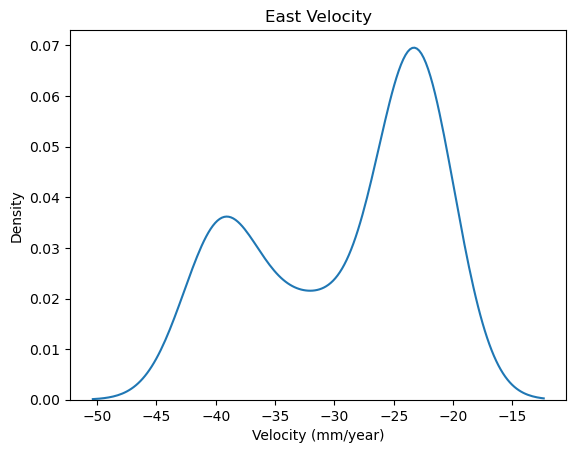

c:\Users\gui-win10\miniconda3\envs\pygmt_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


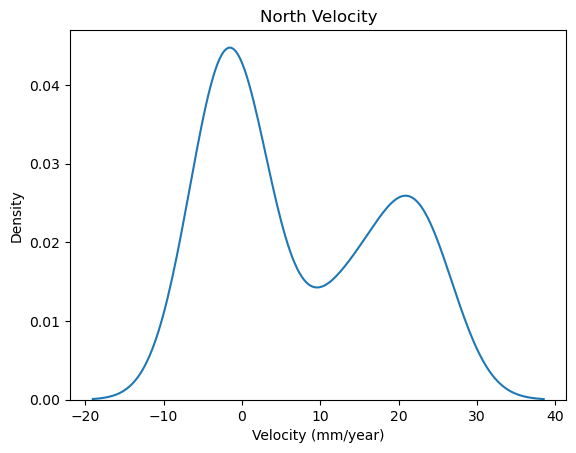

In [231]:
import seaborn as sns

sns.kdeplot(df_velocities["east"], label="East velocity")
plt.xlabel("Velocity (mm/year)")
plt.title("East Velocity")
plt.show()

sns.kdeplot(df_velocities["north"], label="North velocity")
plt.xlabel("Velocity (mm/year)")
plt.title("North Velocity")
plt.show()
# df_velocities

In [233]:
from pykrige.ok import OrdinaryKriging

In [235]:
longitu

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,direction,magnitude
2706,CALB,MIDAS5,2007.5127,2023.6988,16.1861,4502,4187,6978,-0.023499,0.000225,...,0.001,0.002442,0.003064,0.023023,2,37.098328,-120.701669,3.08308,179.451417,0.023500
2740,CAMT,MIDAS5,2007.5455,2023.6988,16.1533,5162,5161,8897,-0.040145,0.023059,...,0.057,0.002029,0.002153,0.006155,1,36.579620,-121.820250,51.48409,150.127250,0.046296
2760,CAOD,MIDAS5,2008.5065,2023.6988,15.1923,4761,4157,6207,-0.022564,-0.002986,...,0.052,0.002233,0.001785,0.007522,4,37.769443,-120.837798,20.96158,-172.461582,0.022761
2797,CARK,MIDAS5,2007.9042,2023.6988,15.7946,5209,5103,7395,-0.022560,-0.003741,...,0.126,0.002179,0.001909,0.009182,4,38.790381,-121.312600,18.33457,-170.584634,0.022868
3309,CMBB,MIDAS5,1994.0287,2024.1862,30.1575,10441,9200,13846,-0.022235,-0.002879,...,0.074,0.002560,0.002234,0.010131,13,38.034176,-120.386041,695.71434,-172.622358,0.022421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13189,P286,MIDAS5,2007.6441,2023.9589,16.3148,5792,5748,10199,-0.021846,-0.000163,...,0.051,0.002171,0.002248,0.006588,2,36.515909,-120.853058,538.83108,-179.572506,0.021847
13190,P287,MIDAS5,2005.0979,2024.1013,19.0034,6836,6502,11585,-0.038889,0.021353,...,0.052,0.002335,0.001852,0.005310,2,36.024836,-120.697834,609.75649,151.229887,0.044366
13191,P288,MIDAS5,2006.1437,2024.1040,17.9603,6410,6240,11090,-0.039560,0.021992,...,0.051,0.001969,0.001809,0.005469,2,36.140208,-120.878904,397.71478,150.929658,0.045262
13192,P289,MIDAS5,2007.0691,2024.1068,17.0377,6187,5990,10217,-0.039319,0.021591,...,0.062,0.002108,0.001679,0.005277,2,36.106843,-120.748819,540.65383,151.227762,0.044857


In [236]:
ok_model = OrdinaryKriging(
    longitude_vector,
    latitude_vector,
    df_velocities["east"],
    variogram_model="exponential",
    verbose=False,
    enable_plotting=False
)

In [239]:
grid_lon = np.linspace(np.min(longitude_vector), np.max(longitude_vector), num=10)
grid_lat = np.linspace(np.min(latitude_vector), np.max(latitude_vector), num=10)
grid_lon, grid_lat = np.meshgrid(grid_lon, grid_lat)

In [240]:
z, ss = ok_model.execute("grid", grid_lon, grid_lat)

In [246]:
ok_model.get_variogram_points()

(array([0.32892352, 0.74191225, 1.19020601, 1.64928668, 2.10965624,
        2.57190283]),
 array([26.98538975, 49.04422059, 63.55854333, 72.31911642, 77.45825117,
        80.47131627]))

In [241]:

# Get experimental variogram
lags, semivariance = ok_model.variogram_function(
    ok_model.variogram_model_parameters,
    ok_model.lags
)

# Define the theoretical variogram model (exponential)
def theoretical_variogram(h, nugget, sill, range_):
    return variogram_models.exponential_variogram_model([nugget, sill, range_], h)

# Get the model parameters from the fitted model
params = ok_model.variogram_model_parameters

# Create a range of distances (h) for theoretical variogram plotting
h_range = np.linspace(0, np.max(lags), 100)

# Calculate the theoretical variogram
model_values = theoretical_variogram(h_range, *params)

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(lags, semivariance, 'o', label='Experimental Variogram')
plt.plot(h_range, model_values, label='Theoretical Exponential Variogram', color='red')
plt.xlabel('Distance')
plt.ylabel('Semivariance')
plt.title('Experimental vs Theoretical Exponential Variogram')
plt.legend()
plt.grid(True)
plt.show()

ValueError: too many values to unpack (expected 2)